# Modulação AM

In [ ]:

import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy import signal as window
import sounddevice as sd
import soundfile   as sf



class signalMenu:
    def __init__(self):
        self.init = 0



    def generateSin(self, freq, amplitude, time, fs):
        n = time*fs
        x = np.linspace(0.0, time, n)
        s = amplitude*np.sin(freq*x*2*np.pi)
        return (x, s)

    def calcFFT(self, signal, fs):
        # https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html
        N  = len(signal)
        W = window.hamming(N)
        T  = 1/fs
        xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
        yf = fft(signal*W)
        return(xf, np.abs(yf[0:N//2]))

    def plotFFT(self, signal, fs):
        x,y = self.calcFFT(signal, fs)
        plt.figure()
        plt.plot(x, np.abs(y))
        plt.title('Fourier')
        plt.show()
        

    

    def LPF(self,signal, cutoff_hz, fs):
        from scipy import signal as sg
        #####################
        # Filtro
        #####################
        # https://scipy.github.io/old-wiki/pages/Cookbook/FIRFilter.html
        nyq_rate = fs/2
        width = 5.0/nyq_rate
        ripple_db = 60.0 #dB
        N , beta = sg.kaiserord(ripple_db, width)
        taps = sg.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
        return( sg.lfilter(taps, 1.0, signal))

## Leitura do som

In [154]:
#leituara do arquivo audio
fs = 44100   # taxqa de amostagem (sample rate)
sd.default.samplerate = fs
sd.default.channels = 1
audio, samplerate = sf.read('audio.wav')
sd.play(audio)
sd.wait()

yAudio = audio[:,1]
samplesAudio = len(yAudio)
Time = np.linspace(0, samplesAudio / fs, num=samplesAudio)

## Normalizando o som

In [141]:
yAudio_normalize = yAudio/max(yAudio)


In [155]:
sd.play(audio)
sd.wait()

## Filtrando o som

In [143]:
audio_filtrado = signalmenu.LPF(yAudio_normalize, 4000, fs)

In [156]:
sd.play(audio_filtrado)
sd.wait()

## Modulando o audio com portadora de 14000 Hz

In [145]:
portadora = np.cos(2*np.pi*14000*Time)
audio_modulado = filtroy*portadora

In [157]:
sd.play(audio_modulado)
sd.wait()

## Gráficos conclusivos do audio de diferente formas

### Som original

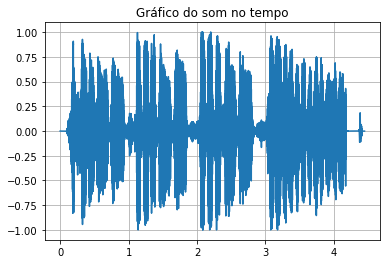

Text(0.5, 1.0, 'Gráfico da frequencia do som')

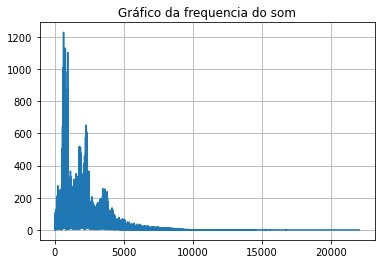

In [147]:
plt.plot(Time,yAudio)
plt.title('Gráfico do som no tempo')
plt.grid()
plt.show()
signalmenu = signalMenu()

X, Y = signalmenu.calcFFT(yAudio, fs)
plt.figure("Fourier Audio")
plt.plot(X, np.abs(Y))
plt.grid()
plt.title('Gráfico da frequencia do som')

### Som normalizado

Text(0.5, 1.0, 'Gráfico da frequencia do som normalizado')

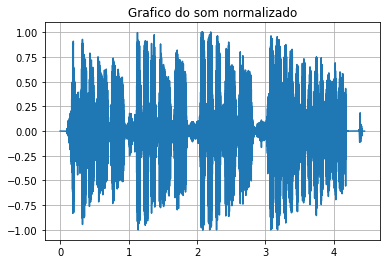

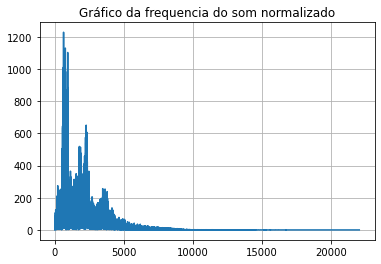

In [148]:
plt.plot(Time,yAudio_normalize)
plt.grid()
plt.title("Grafico do som normalizado")
X, Y = signalmenu.calcFFT(yAudio_normalize, fs)
plt.figure("Fourier Audio")
plt.plot(X, np.abs(Y))
plt.grid()
plt.title('Gráfico da frequencia do som normalizado')

### Som filtrado

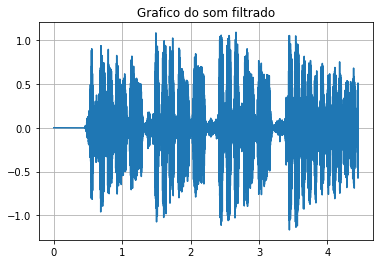

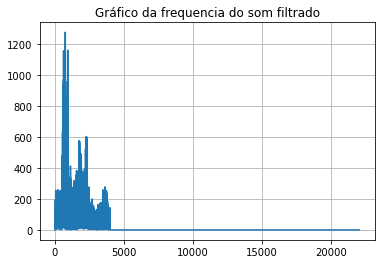

In [149]:
plt.plot(Time,audio_filtrado)
plt.grid()
plt.title("Grafico do som filtrado")
plt.show()
X, Y = signalmenu.calcFFT(audio_filtrado, fs)
plt.figure("Fourier Audio Filtrado")
plt.plot(X, np.abs(Y))
plt.grid()
plt.title('Gráfico da frequencia do som filtrado')
plt.show()

### Som modulado

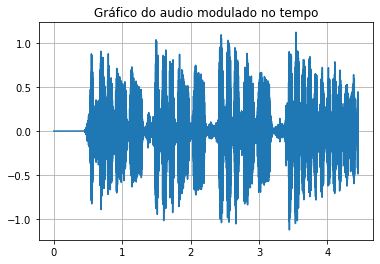

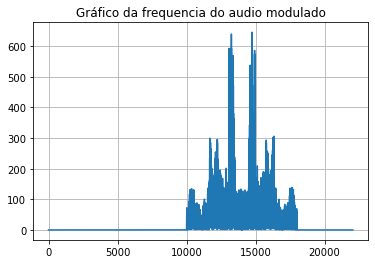

In [150]:
plt.plot(Time,audio_modulado)
plt.grid()
plt.title("Gráfico do audio modulado no tempo")
plt.show()

X, Y = signalmenu.calcFFT(audio_modulado, fs)
plt.plot(X, np.abs(Y))
plt.grid()
plt.title('Gráfico da frequencia do audio modulado')
plt.show()

## demodulando o som

In [151]:
audio_demodulado = portadora * audio_modulado
audio_filtrado = signalmenu.LPF(audio_demodulado, 4000, fs)


In [158]:
sd.play(audio_filtrado)
sd.wait()

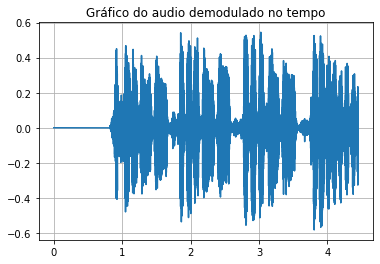

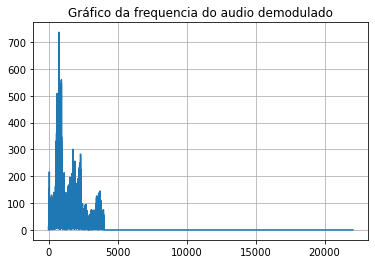

In [153]:
plt.plot(Time,audio_filtrado)
plt.grid()
plt.title("Gráfico do audio demodulado no tempo")
plt.show()

X, Y = signalmenu.calcFFT(audio_filtrado, fs)
plt.plot(X, np.abs(Y))
plt.grid()
plt.title('Gráfico da frequencia do audio demodulado')
plt.show()